# Hand Written Digit Recognition

In [1]:
import joblib
import numpy as np
from numpy.typing import NDArray
from sklearn.datasets import fetch_openml
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, StackingClassifier
from sklearn.utils import Bunch
from sklearn.metrics import precision_score, ConfusionMatrixDisplay

In [2]:
NDArrayInt = NDArray[np.int_]
NDArrayStr = NDArray[np.str_]

## Loading Dataset

In [3]:
mnist: Bunch = fetch_openml('mnist_784', parser= 'auto', as_frame= False)
data, target = mnist['data'], mnist['target']
X_train, y_train = data[:60_000], target[:60_000]
X_test, y_test = data[60_000:], target[60_000:]

## Trying different models

In [4]:
rnd_forest_clf = RandomForestClassifier(n_jobs= -1, random_state= 42)
knn_clf = KNeighborsClassifier(n_jobs= -1)
extra_trees_clf = ExtraTreesClassifier(n_jobs= -1, random_state= 42)

rnd_forest_clf.fit(X_train, y_train)
knn_clf.fit(X_train, y_train)
extra_trees_clf.fit(X_train, y_train)

ExtraTreesClassifier(n_jobs=-1, random_state=42)

In [5]:
rnd_forest_clf.score(X_test, y_test)

0.9705

In [6]:
knn_clf.score(X_test, y_test)

0.9688

In [7]:
extra_trees_clf.score(X_test, y_test)

0.9722

In [8]:
stacking_clf = StackingClassifier(
    estimators= [
        ('rnd', rnd_forest_clf),
        ('knn', knn_clf),
        ('extra', extra_trees_clf)
    ],
    n_jobs= -1,
    final_estimator= RandomForestClassifier(random_state= 1234)
)
stacking_clf.fit(X_train, y_train)
stacking_clf.score(X_test, y_test)

0.9799

In [9]:
predictions: NDArrayStr = stacking_clf.predict(X_test)

In [10]:
precision_score(y_test, predictions, average= 'micro')

0.9799

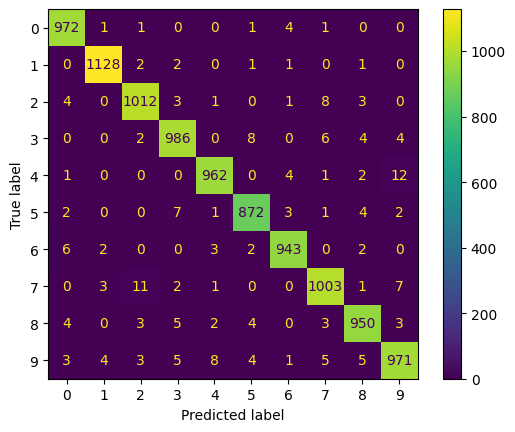

In [11]:
ConfusionMatrixDisplay.from_estimator(stacking_clf, X_test, y_test)

In [12]:
joblib.dump(stacking_clf, 'stacking_clf.pkl')

['stacking_clf.pkl']